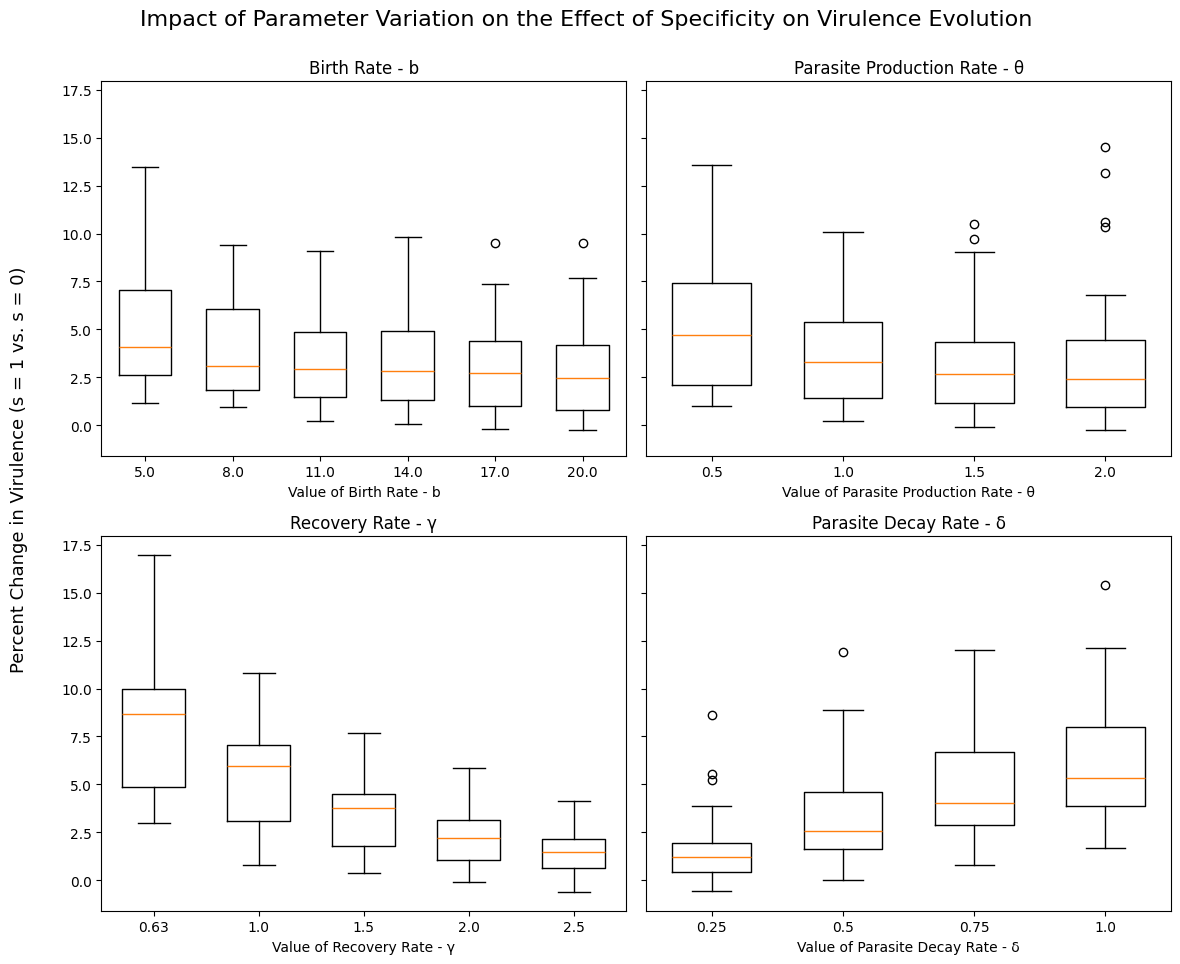

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Read CSV data
df = pd.read_csv("parameter_sweep_results.csv")  

# Drop rows where MeanAlpha_s0 == 0 or MeanAlpha_s1 == 0
# (i.e., runs that went extinct or produced invalid results)
df = df[(df["MeanAlpha_s0"] != 0) & (df["MeanAlpha_s1"] != 0) & (df["PercentDiff"] != 0)]

params = ['b', 'theta', 'gamma', 'delta']

# Create subplots (2x2)
fig, axes = plt.subplots(2, 2, figsize=(12, 10), sharey=True)
axes = axes.flatten()  # Flatten to allow 1D indexing

# Create y-axis limits based on overall data range
y_min = df['PercentDiff'].min() - 1
y_max = df['PercentDiff'].max() + 1

# Titles corresponding to each parameter
titles = {
    'b': "Birth Rate - b",
    'theta': "Parasite Production Rate - θ",
    'gamma': "Recovery Rate - γ",
    'delta': "Parasite Decay Rate - δ"
}

for i, param in enumerate(params):
    ax = axes[i]
    
    # Subset the dataframe for the current parameter
    sub_df = df[df['VariedParam'] == param]

    # Sort unique parameter values for consistent plotting
    unique_vals = sorted(sub_df['VariedValue'].unique())

    # Collect PercentDiff values for each parameter value
    data_for_boxplot = [sub_df[sub_df['VariedValue'] == val]['PercentDiff'].dropna().values 
                        for val in unique_vals]

    # Plot boxplot
    ax.boxplot(data_for_boxplot, positions=range(1, len(unique_vals) + 1), widths=0.6)

    # Titles, labels, and ticks
    ax.set_title(f"{titles[param]}")
    ax.set_xlabel(f"Value of {titles[param]}")
    
    # Set consistent x-ticks
    ax.set_xticks(range(1, len(unique_vals) + 1))
    ax.set_xticklabels([str(v) for v in unique_vals])

    # Consistent y-axis limits across all subplots
    ax.set_ylim([y_min, y_max])

# Add overarching y-axis label
fig.text(0.02, 0.5, "Percent Change in Virulence (s = 1 vs. s = 0)", va='center', rotation='vertical', fontsize=13)

# Main figure title
fig.suptitle("Impact of Parameter Variation on the Effect of Specificity on Virulence Evolution", fontsize=16, y=0.96)

# Adjust layout to prevent overlapping
plt.tight_layout(rect=[0.05, 0, 1, 0.96])
plt.savefig('parameter_sweep.png', dpi=750)